In [1]:
import pandas as pd
import numpy as np

# Graphical analysis
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# for model building
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV


In [2]:
data=pd.read_excel('s2cbr.xlsx')
data.shape

(123, 13)

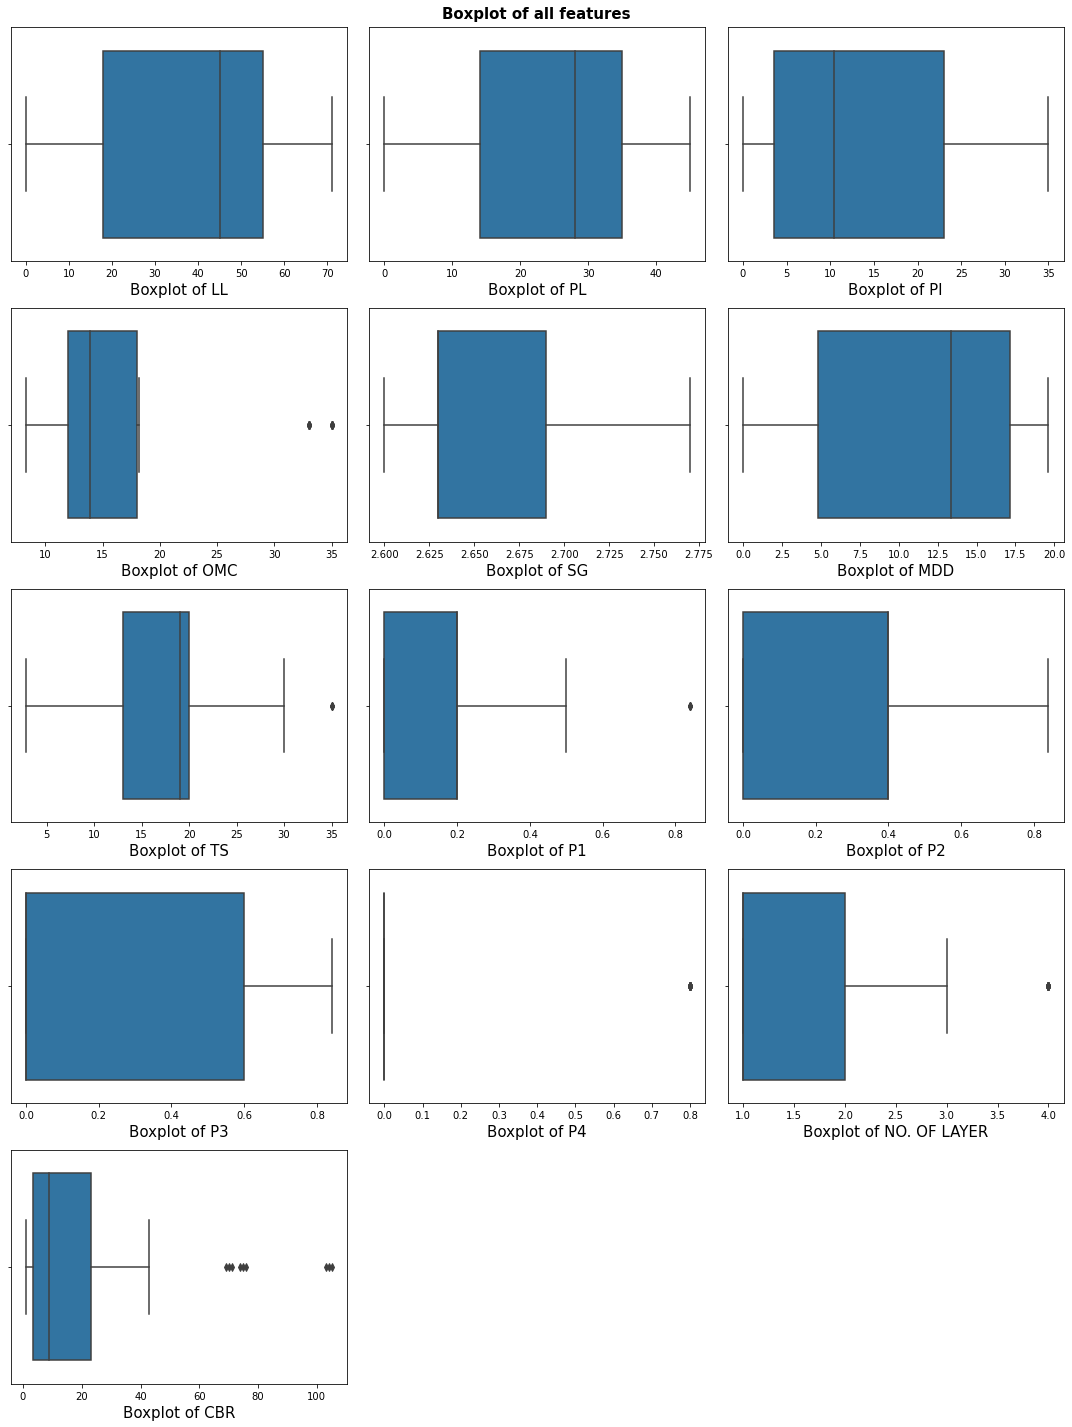

In [3]:
#check the outliers
plt.figure(figsize=(15,20),facecolor='White')
plt.suptitle("Boxplot of all features", fontweight = 'bold', fontsize = 15,y = 0.989)
for i in range(0,len(data.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x = data.columns[i], data = data)
    plt.xlabel("Boxplot of {}".format(data.columns[i]),fontsize = 15)
    plt.tight_layout()

In [4]:
data.describe().T # describe data points

,count,mean,std,min,25%,50%,75%,max
LL,123.0,36.975610,24.268128,0.0000,18.00,45.00,55.000,71.00
PL,123.0,23.910569,15.420344,0.0000,14.00,28.00,35.000,45.00
PI,123.0,13.728455,11.533902,0.0000,3.50,10.40,23.000,35.00
OMC,123.0,16.941463,7.948697,8.3000,12.00,13.90,18.000,35.00
SG,123.0,2.651626,0.042990,2.6000,2.63,2.63,2.690,2.77
MDD,123.0,11.765984,6.464870,0.0019,4.85,13.33,17.120,19.62
TS,123.0,18.369431,7.775770,2.8100,13.00,19.00,20.000,35.00
P1,123.0,0.186585,0.183753,0.0000,0.00,0.20,0.200,0.84
P2,123.0,0.249756,0.265075,0.0000,0.00,0.40,0.400,0.84
P3,123.0,0.261463,0.334048,0.0000,0.00,0.00,0.600,0.84


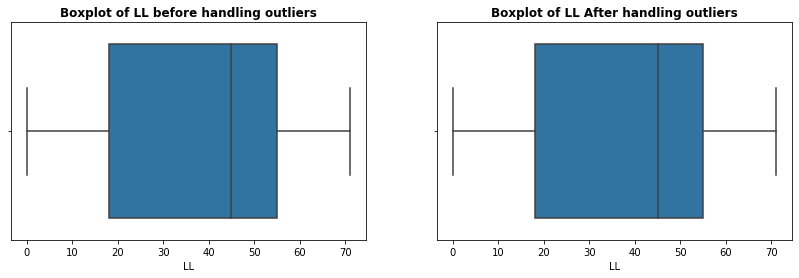

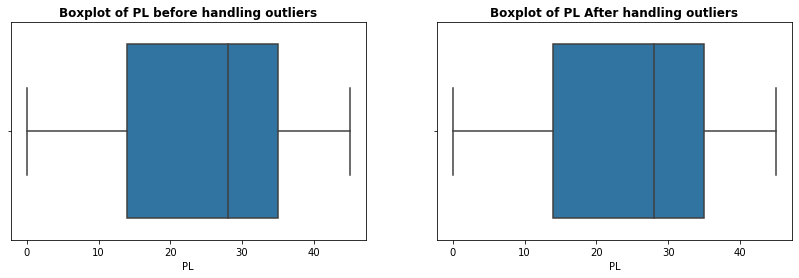

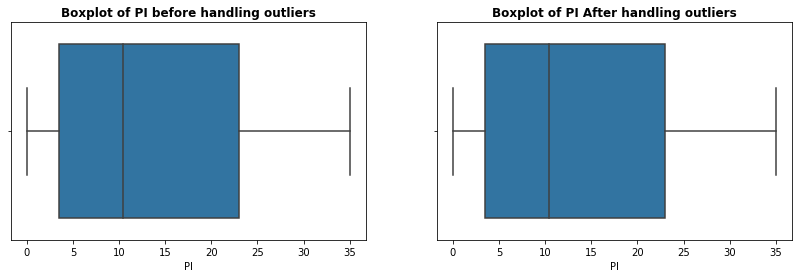

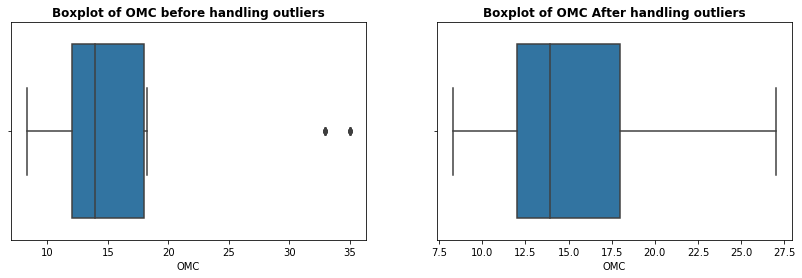

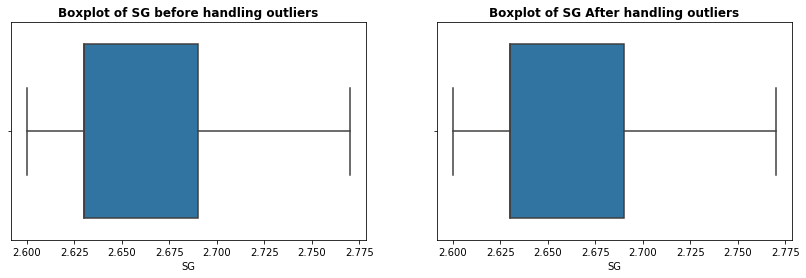

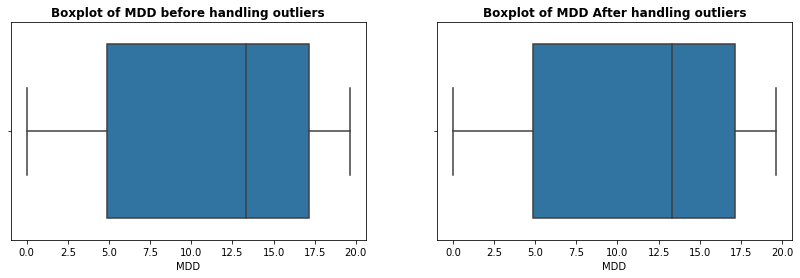

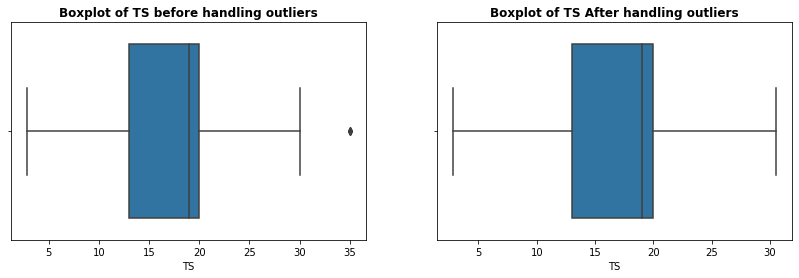

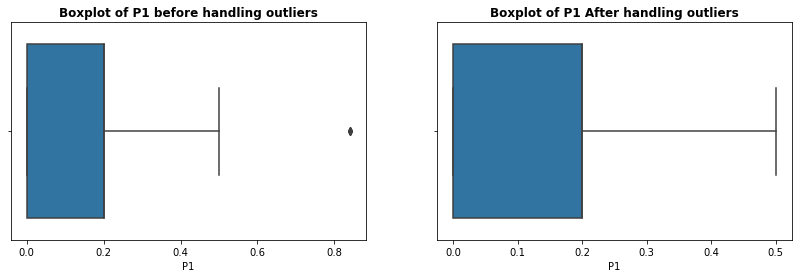

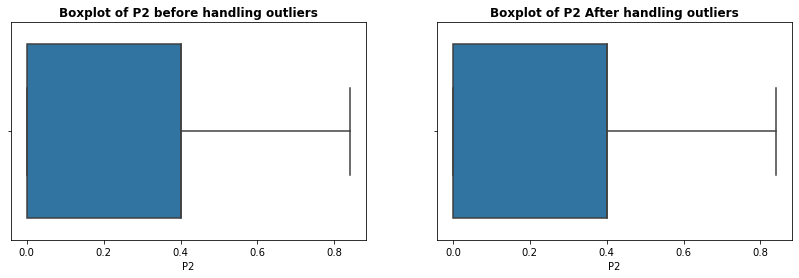

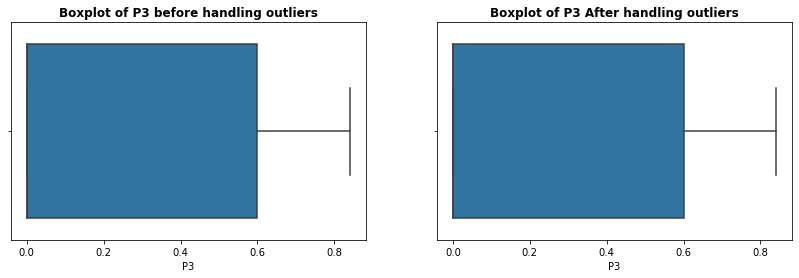

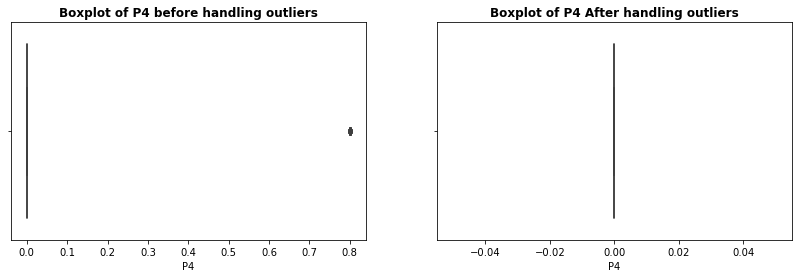

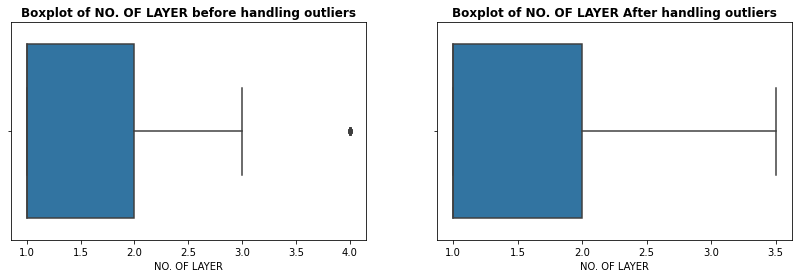

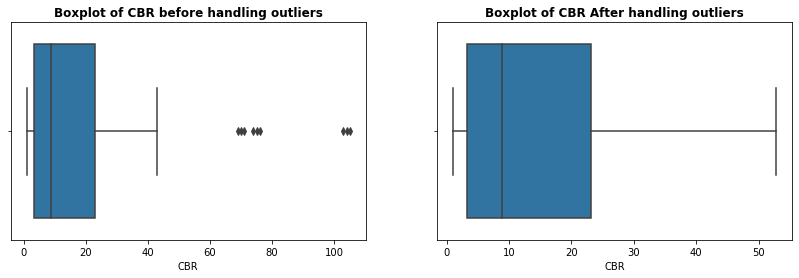

In [5]:
df1 = data.copy()
feature_to_use = df1.columns

for i in range(len(feature_to_use)):
    IQR = df1[feature_to_use[i]].quantile(0.75) - df1[feature_to_use[i]].quantile(0.25)
    Lower_Limit = df1[feature_to_use[i]].quantile(0.25) - (1.5*IQR)
    UPPER_LIMIT = df1[feature_to_use[i]].quantile(0.75) + (1.5*IQR)
    df1[feature_to_use[i]]= np.where(df1[feature_to_use[i]]>UPPER_LIMIT,UPPER_LIMIT,
                                np.where(df1[feature_to_use[i]]<Lower_Limit,Lower_Limit,df1[feature_to_use[i]]))


for fea in feature_to_use:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.boxplot(x = fea, data = data)
    plt.title("Boxplot of {} before handling outliers".format(fea),fontweight = 'bold')

    plt.subplot(122)
    sns.boxplot(x = fea, data = df1)
    plt.title("Boxplot of {} After handling outliers".format(fea),fontweight = 'bold')
    plt.show()

In [6]:
x = df1.iloc[:,:-1]
y = df1['CBR']

In [7]:
x.shape,y.shape


((123, 11), (123,))

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 42 )

In [9]:
x_train.shape,y_train.shape

((86, 11), (86,))

In [10]:
x_test.shape,y_test.shape

((37, 11), (37,))

In [11]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [12]:
report = []

In [13]:
models = {
    "Linear Regression" : LinearRegression(),
    "Ridge Regression" : Ridge(),
    "Lasso Regression" : Lasso(),
    "Support Vector Regression" : SVR(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)   # Training Model

    # Prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training Data perfomance Matrix
    model_train_mse = mean_squared_error(y_train,y_train_pred)   # Calculate MSE
    model_train_mae = mean_absolute_error(y_train,y_train_pred)  # Calculate MAE
    model_train_r2 = r2_score(y_train,y_train_pred)              # Calculate 2 sqaure
    model_train_ad_r2 = 1 - (1-model_train_r2)*(len(y_train)-1) / (len(y_train)- x_train.shape[1] - 1)

    
    # Test Data perfomance Matrix
    model_test_mse = mean_squared_error(y_test,y_test_pred)   # Calculate MSE
    model_test_mae = mean_absolute_error(y_test,y_test_pred)  # Calculate MAE
    model_test_r2 = r2_score(y_test,y_test_pred)              # Calculate 2 sqaure
    model_test_ad_r2 = 1 - (1-model_test_r2)*(len(y_test)-1) / (len(y_test)- x_test.shape[1] - 1)
    # print("\n")
    # print((list(models.keys()))[i])

    # print("Model Performance For Training Data")
    # print("-Mean Squared Error : {:4f}".format(model_train_mse))
    # print("-Mean Absolute Error : {:.4f}".format(model_train_mae))
    # print("-R Sqaure : {:.4f}".format(model_train_r2))
    # print("-Adj R Sqaure : {:.4f}".format(model_train_ad_r2))

    # print("-----------------------------------------------------------------------")

    # print("Model Performance For Test Data")
    # print("-Mean Squared Error : {:4f}".format(model_test_mse))
    # print("-Mean Absolute Error : {:.4f}".format(model_test_mae))
    # print("-R Sqaure : {:.4f}".format(model_test_r2))
    # print("-Adj R Sqaure : {:.4f}".format(model_test_ad_r2))

    # print("="*80)

    report.append({
                    "model" : (list(models.keys()))[i],
                    'Train Mean Squared Error ' : model_train_mse,
                    'Test Mean Squared Error' : model_test_mse,
                    'Train Mean Absolute Error' : model_train_mae,
                    'Test Mean Absolute Error' : model_test_mae,
                    'Train R Sqaure' : model_train_r2,
                    'Test R Sqaure' : model_test_r2,
                    'Train Adj R Sqaure' : model_train_ad_r2,
                    'Test Adj R Sqaure' : model_test_ad_r2
    })

all_model = pd.DataFrame(report)
all_model

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
0,Linear Regression,120.449874,130.441974,8.661059,9.216249,0.500609,0.355751,0.426375,0.072281
1,Ridge Regression,120.582458,129.729615,8.648007,9.203494,0.500059,0.359269,0.425743,0.077347
2,Lasso Regression,130.191553,124.795675,9.199496,9.098412,0.460219,0.383637,0.379981,0.112438
3,Support Vector Regression,161.200154,151.099996,8.757149,8.476071,0.331656,0.253721,0.232307,-0.074642
4,Decision Tree Regressor,3.573199,41.029726,0.567076,3.757133,0.985185,0.797355,0.982983,0.708192
5,Random Forest Regressor,5.767254,41.141213,1.388683,4.721118,0.976089,0.796805,0.972534,0.707399


In [15]:
report2 = []
# Bagging using DecisionTreeRegressor
dt_bag = BaggingRegressor(n_estimators=100)
#If None, then the base estimator is a DecisionTreeRegressor.
dt_bag.fit(x_train,y_train)

# Make predictions
train_pred_bag =dt_bag.predict(x_train)
test_pred_bag = dt_bag.predict(x_test)

# Training dataset performance matrix
bag_train_mse = mean_squared_error(y_train,train_pred_bag)   # Calculate MSE
bag_train_mae = mean_absolute_error(y_train,train_pred_bag)  # Calculate MAE
bag_train_r2 = r2_score(y_train,train_pred_bag)              # Calculate 2 sqaure
bag_train_ad_r2 = 1 - (1-bag_train_r2)*(len(y_train)-1) / (len(y_train)- x_train.shape[1] - 1)


# Test Data perfomance Matrix
bag_test_mse = mean_squared_error(y_test,test_pred_bag)   # Calculate MSE
bag_test_mae = mean_absolute_error(y_test,test_pred_bag)  # Calculate MAE
bag_test_r2 = r2_score(y_test,test_pred_bag)              # Calculate 2 sqaure
bag_test_ad_r2 = 1 - (1-bag_test_r2)*(len(y_test)-1) / (len(y_test)- x_test.shape[1] - 1)

# # print("\n")
# print("Bagging Regressor")

# print("Model Performance For Training Data")
# print("-Mean Squared Error : {:4f}".format(bag_train_mse))
# print("-Mean Absolute Error : {:.4f}".format(bag_train_mae))
# print("-R Sqaure : {:.4f}".format(bag_train_r2))
# print("-Adj R Sqaure : {:.4f}".format(bag_train_ad_r2))

# print("-----------------------------------------------------------------------")

# print("Model Performance For Test Data")
# print("-Mean Squared Error : {:4f}".format(bag_test_mse))
# print("-Mean Absolute Error : {:.4f}".format(bag_test_mae))
# print("-R Sqaure : {:.4f}".format(bag_test_r2))
# print("-Adj R Sqaure : {:.4f}".format(bag_test_ad_r2))

report2.append({
                "model" : 'Bagging Regressor',
                'Train Mean Squared Error ' : bag_train_mse,
                'Test Mean Squared Error' : bag_test_mse,
                'Train Mean Absolute Error' : bag_train_mae,
                'Test Mean Absolute Error' : bag_test_mae,
                'Train R Sqaure' : bag_train_r2,
                'Test R Sqaure' : bag_test_r2,
                'Train Adj R Sqaure' : bag_train_ad_r2,
                'Test Adj R Sqaure' : bag_test_ad_r2
})

Bagging_report = pd.DataFrame(report2)
Bagging_report

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
0,Bagging Regressor,6.353607,47.47405,1.444364,5.238548,0.973658,0.765527,0.969742,0.662359


In [16]:
frames3 = [all_model,Bagging_report]
all_records = pd.concat(frames3) 
all_records.reset_index(inplace=True)
all_records.drop('index',axis = 1,inplace = True)
all_records.sort_values(by = 'Test R Sqaure',ascending=False)

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
4,Decision Tree Regressor,3.573199,41.029726,0.567076,3.757133,0.985185,0.797355,0.982983,0.708192
5,Random Forest Regressor,5.767254,41.141213,1.388683,4.721118,0.976089,0.796805,0.972534,0.707399
6,Bagging Regressor,6.353607,47.474050,1.444364,5.238548,0.973658,0.765527,0.969742,0.662359
2,Lasso Regression,130.191553,124.795675,9.199496,9.098412,0.460219,0.383637,0.379981,0.112438
1,Ridge Regression,120.582458,129.729615,8.648007,9.203494,0.500059,0.359269,0.425743,0.077347
0,Linear Regression,120.449874,130.441974,8.661059,9.216249,0.500609,0.355751,0.426375,0.072281
3,Support Vector Regression,161.200154,151.099996,8.757149,8.476071,0.331656,0.253721,0.232307,-0.074642
